## 02DEMO: Training

![Training](./fig/trainning.png)

In [1]:
import sys
sys.path.append("../deeplab/")

import yaml

from config_yml import ExperimentOptions
import tensorflow as tf

2023-05-02 23:16:51.173944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 23:16:51.789809: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-02 23:16:53.003904: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-02 23:16:53.004169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
mode = 'train' #train, evl, test
model_dir = "../../../data/deepyeastmodel/v_1.0.0/checkpoint/"
train_dir = "../../../data/deepyeastmodel/v_1.0.0/tf/train*.tfrecord"
eval_dir = "../../../data/deepyeastmodel/v_1.0.0/tf/val*.tfrecord"
config_path = "../deeplab/configs/config_wl.yaml"
num_gpus = 1

In [3]:
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)

# configs.model_options.backbone.drop_path_keep_prob=1
configs.train_dataset_options.file_pattern=train_dir
configs.eval_dataset_options.file_pattern=eval_dir

## Converts your data to sharded TFRecord file format

In [14]:
from data.build_cell_data import _convert_dataset

In [8]:
_convert_dataset("/home/wd/data/deepyeast_training_data/set_as1/", "train", "/home/wd/data/deepyeast_training_data/set_as1/tf/", True)

/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_01_00.png
4032
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_02_03.png
4053
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_03_01.png
4040
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_04_04.png
4050
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_05_05.png
4029
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_06_01.png
4041
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_07_07.png
4041
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_08_05.png
4032
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_09_01.png
4031
/home/wd/data/deepyeast_training_data/set_as1/images/train/1_100_2x2/3306_REF_DIC_10_04.png
4051
/home/wd/data/deepyeast_traini

### Check dataset

In [15]:
from trainer import runner_utils

In [16]:
celldataset = runner_utils.create_dataset(configs.train_dataset_options,
    is_training=True,                      
    only_semantic_annotations=False)

In [18]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-05-02 22:32:51.762319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-05-02 22:32:51.762639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-05-02 22:32:54.692965: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16646400 exceeds 10% of free system memory.
2023-05-02 22:32:54.794578: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16646400 exceeds 10% of free system memory.
2023-05-02 22:32:54.814121: W tensorflow

['image', 'semantic_gt', 'semantic_loss_weight', 'is_crowd_gt', 'panoptic_gt', 'center_loss_weight', 'regression_loss_weight', 'instance_center_gt', 'instance_regression_gt']
(32, 513, 513, 1) 65535.0 0.0 int32


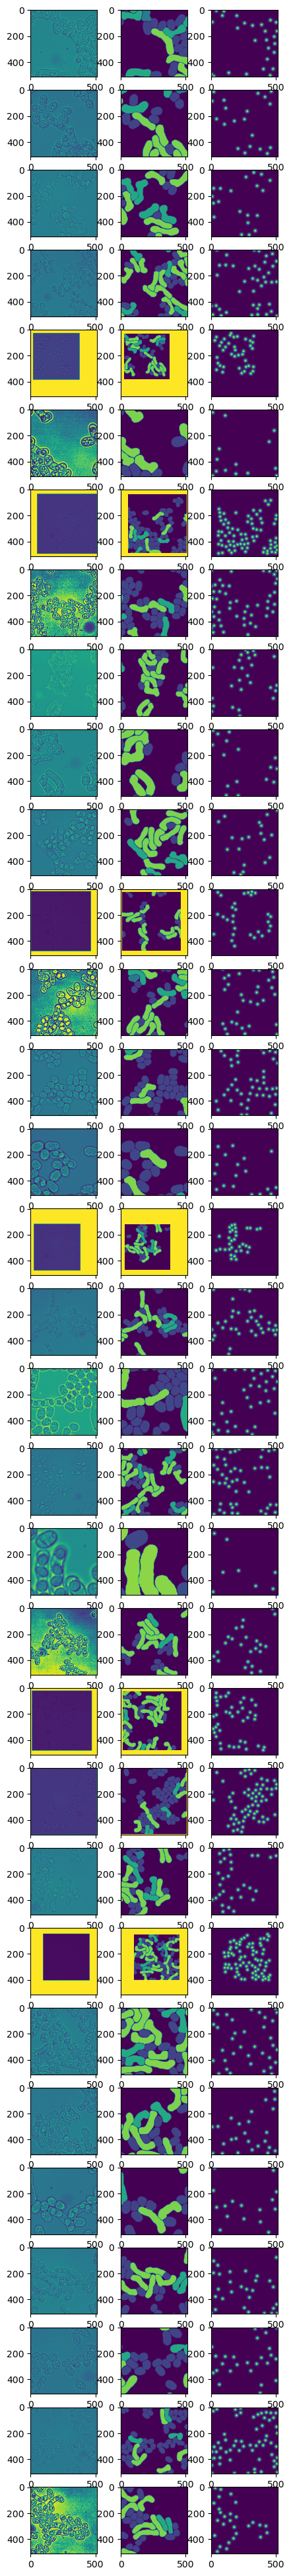

In [19]:
for example in tfds.as_numpy(celldataset.take(1)):  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    print(list(example.keys()))
    image = example["image"]
    gt = example["panoptic_gt"]
    ct = example["instance_center_gt"]
  # label = example["label"]
    print(image.shape,image.max(),image.min(), gt.dtype)

fig,axs = plt.subplots(image.shape[0], 3, figsize=(5, 50))
for i in range(0,image.shape[0]):
    axs[i,0].imshow(image[i,:,:,0])
    axs[i,1].imshow(gt[i,:,:],vmax=5000)
    axs[i,2].imshow(ct[i,:,:])
    # print(image[i,:,:,0].max(),image[i,:,:,0].min())

## Training

In [4]:
from trainer.train import DeepCellModule

In [5]:
mode = 'train'
model_dir = "/home/wd/project/trained_tmp_model/"
num_gpus=1

In [6]:
selfmodel = DeepCellModule(mode, configs, num_gpus, model_dir=model_dir)

2023-05-02 23:17:01.715288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-02 23:17:01.816439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-05-02 23:17:01.816455: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-02 23:17:01.817303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

/home/wd/project/trained_tmp_model/
restoring or initializing model...
restored model from /home/wd/project/trained_tmp_model/ckpt-100000.
restored from checkpoint: /home/wd/project/trained_tmp_model/ckpt-100000


In [ ]:
selfmodel.train()

train | step:  100000 | training until step 102000...
create training loop!
self._train_iter is None


2023-05-02 23:17:08.670450: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


run _train_iter, numsteps: <tensorflow.python.distribute.input_lib.DistributedIterator object at 0x7f62443b6970> tf.Tensor(100, shape=(), dtype=int32)


## evaluate

In [7]:
selfmodel.evaluate(steps=-1)

NameError: name 'selfmodel' is not defined

In [27]:
tf.__version__

'2.12.0'